In [1]:
from TTS.tts.configs.xtts_config import XttsConfig
from TTS.tts.models.xtts import Xtts

config = XttsConfig()
config.load_json(
    "/Users/elnuralimirzayev/Thesis/saved_model2/GPT_XTTS_v2.0_LJSpeech_FT-August-11-2024_10+29PM-bacdce4/config.json"
)
model = Xtts.init_from_config(config)
model.load_checkpoint(
    config,
    checkpoint_dir="/Users/elnuralimirzayev/Thesis/saved_model2/GPT_XTTS_v2.0_LJSpeech_FT-August-11-2024_10+29PM-bacdce4",
    eval=True,
    vocab_path="/Users/elnuralimirzayev/Thesis/notebooks/xttsv2_esd_train/vocab.json",
)
model.cpu()

outputs = model.synthesize(
    "[LAUGHTER] But though on the whole, except in Italy, Gothic letter was most often used!",
    config,
    speaker_wav="/Users/elnuralimirzayev/Thesis/notebooks/xttsv2_esd_train/LJ001-0003.wav",
    gpt_cond_len=3,
    language="en",
)


In [2]:
import soundfile as sf

raw_audio = outputs['wav']
sample_rate = 24000
output_path = "/Users/elnuralimirzayev/Thesis/notebooks/xttsv2_esd_train/examples/exp3/surprise/out3_laughter.wav"
sf.write(output_path, raw_audio, sample_rate)

[15  9 12 ... 23 46 37]


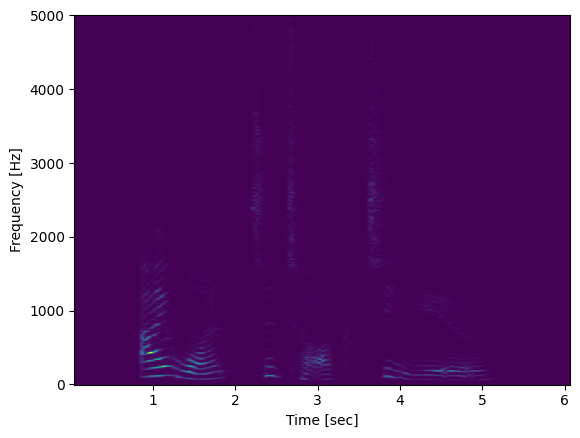

In [203]:
%matplotlib inline
# Generate spectrogram
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
import os
import numpy as np
import matplotlib

wav_path = os.path.join(os.path.dirname(os.path.abspath("__file__")), "examples/exp3/angry/out1_angry.wav")
sample_rate, samples = wavfile.read(wav_path)

print(samples)
Pxx, freqs, bins, im = plt.specgram(samples, NFFT=1024, Fs=10000, noverlap=900, scale="linear", mode="magnitude")

plt.pcolormesh(bins, freqs, Pxx)
plt.ylabel("Frequency [Hz]")
plt.xlabel("Time [sec]")
plt.show()

In [210]:
import numpy as np
from scipy.io import wavfile
from scipy import fft
import matplotlib.pyplot as plt

def show(path):
    # Read some sample file (replace with your data):
    rate, data = wavfile.read(path)
    # rate=48000, data.shape=(46447, 2) ~ almost 1s of stereo signal

    # Spectrogram estimation:
    N = 256
    S = []
    for k in range(0, data.shape[0]+1, N):
        x = fft.fftshift(fft.fft(data[k:k+N], n=N))[N//2:N]
        # assert np.allclose(np.imag(x*np.conj(x)), 0)
        Pxx = 10*np.log10(np.real(x*np.conj(x)))
        S.append(Pxx)
    S = np.array(S)

    # Frequencies:
    f = fft.fftshift(fft.fftfreq(N, d=1/rate))[N//2:N]
    # array([    0. ,   187.5,   375. , ..., 23625. , 23812.5])

    # Spectrogram rendering:
    plt.imshow(S.T, origin='lower')

/var/folders/jx/hnjlm6117wxc61xr6ppvc5zc0000gn/T/ipykernel_94764/1374528058.py:17: RuntimeWarning: divide by zero encountered in log10
  Pxx = 10*np.log10(np.real(x*np.conj(x)))


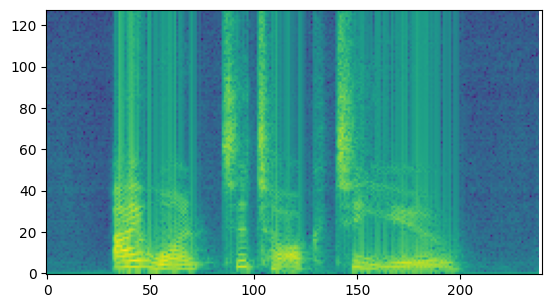

In [212]:
show(os.path.join(os.path.dirname(os.path.abspath("__file__")), "examples/exp3/angry/out1_angry.wav"))

/var/folders/jx/hnjlm6117wxc61xr6ppvc5zc0000gn/T/ipykernel_94764/1374528058.py:17: RuntimeWarning: divide by zero encountered in log10
  Pxx = 10*np.log10(np.real(x*np.conj(x)))


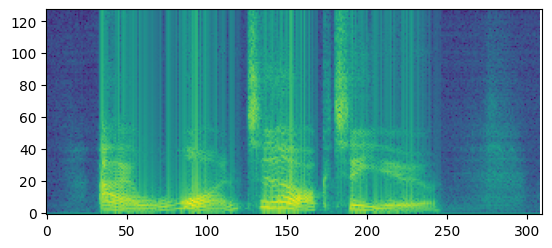

In [213]:
show(os.path.join(os.path.dirname(os.path.abspath("__file__")), "examples/exp3/happy/out1_happy.wav"))

/var/folders/jx/hnjlm6117wxc61xr6ppvc5zc0000gn/T/ipykernel_94764/1374528058.py:17: RuntimeWarning: divide by zero encountered in log10
  Pxx = 10*np.log10(np.real(x*np.conj(x)))


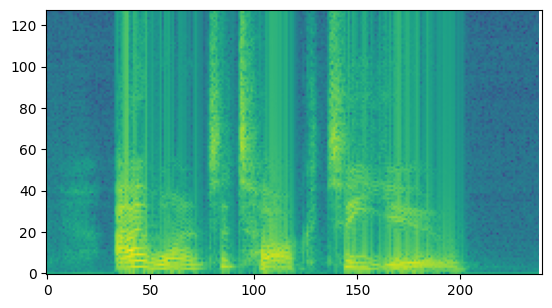

In [214]:
show(os.path.join(os.path.dirname(os.path.abspath("__file__")), "examples/exp3/neutral/out1_neutral.wav"))

/var/folders/jx/hnjlm6117wxc61xr6ppvc5zc0000gn/T/ipykernel_94764/1374528058.py:17: RuntimeWarning: divide by zero encountered in log10
  Pxx = 10*np.log10(np.real(x*np.conj(x)))


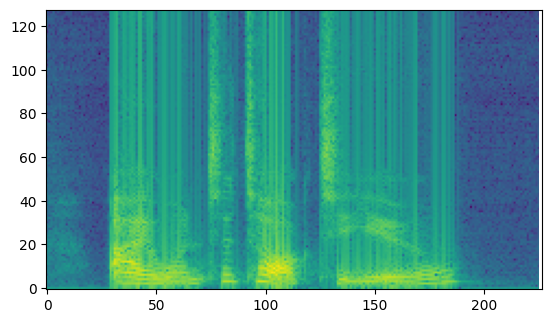

In [215]:
show(os.path.join(os.path.dirname(os.path.abspath("__file__")), "examples/exp3/sad/out1_sad.wav"))

/var/folders/jx/hnjlm6117wxc61xr6ppvc5zc0000gn/T/ipykernel_94764/1374528058.py:17: RuntimeWarning: divide by zero encountered in log10
  Pxx = 10*np.log10(np.real(x*np.conj(x)))


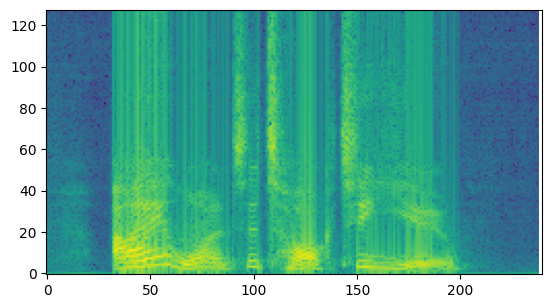

In [216]:
show(os.path.join(os.path.dirname(os.path.abspath("__file__")), "examples/exp3/surprise/out1_surprise.wav"))